In [1]:
import pipeline as pipeline
print(pipeline.__file__)

/Users/Dev/AMD/dismod_mr_migrated/reforged_mr/model/spline.py
/Users/Dev/AMD/dismod_mr_migrated/reforged_mr/model/priors.py
/Users/Dev/AMD/dismod_mr_migrated/reforged_mr/model/age_groups.py
/Users/Dev/AMD/dismod_mr_migrated/reforged_mr/model/covariates.py
/Users/Dev/AMD/dismod_mr_migrated/reforged_mr/model/likelihood.py
/Users/Dev/AMD/dismod_mr_migrated/reforged_mr/pipeline.py


In [2]:
input_dir  = './input_data'
stage_dirs = ['amd_sim_data', 'amd_sim_data_Early', 'amd_sim_data_Intermediate', 'amd_sim_data_Late-dry', 'amd_sim_data_Late-wet']
stage      = stage_dirs[2] # Intermediate

pm_model = pipeline.initiliaze_pipeline(f'{input_dir}/{stage}', verbose=True)

number of rows: 207
number of unique location_id: 18
number of nodes: 233
number of edges: 232


In [3]:
rate_types = ['beta_binom', 'binom', 'neg_binom', 'poisson', 'log_normal', 'normal', 'offset_log_normal']
rate_type = rate_types[2]

pipeline.generate_pymc_objects(pm_model, rate_type=rate_type, include_covariates=True)

Standard errors replaced: 0
Effective sample sizes filled: 0


In [4]:
map_estimate = pipeline.return_map_estimate(pm_model=pm_model, verbose=True)

INFO:pipeline:  ▶ pm.find_MAP() 수행 중...


In [5]:
idata = pipeline.return_idata(pm_model     = pm_model, 
                            map_estimate   = map_estimate, 
                            draws          = 2000,
                            tune           = 1000,
                            chains         = 4,
                            cores          = 4,
                            target_accept  = 0.9,
                            max_treedepth  = 10,
                            use_advi       = False,
                            use_metropolis = True,
                            verbose=True
                            ) 
# 198.3초 소요

INFO:pipeline:  ▶ Metropolis 샘플링 수행 중...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc:Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
INFO:pymc:CompoundStep
>Metropolis: [gamma_p]
INFO:pymc:>Metropolis: [gamma_p]
>Metropolis: [sigma_alpha_p_0_z]
INFO:pymc:>Metropolis: [sigma_alpha_p_0_z]
>Metropolis: [sigma_alpha_p_1_z]
INFO:pymc:>Metropolis: [sigma_alpha_p_1_z]
>Metropolis: [sigma_alpha_p_2_z]
INFO:pymc:>Metropolis: [sigma_alpha_p_2_z]
>Metropolis: [sigma_alpha_p_3_z]
INFO:pymc:>Metropolis: [sigma_alpha_p_3_z]
>Metropolis: [sigma_alpha_p_4_z]
INFO:pymc:>Metropolis: [sigma_alpha_p_4_z]
>Metropolis: [alpha_p_31]
INFO:pymc:>Metropolis: [alpha_p_31]
>Metropolis: [alpha_p_56]
INFO:pymc:>Metropolis: [alpha_p_56]
>Metropolis: [alpha_p_62]
INFO:pymc:>Metropolis: [alpha_p_62]
>Metropolis: [alpha_p_64]
INFO:pymc:>Metropolis: [alpha_p_64]
>Metropolis: [alpha_p_70]
INFO:pymc:>Metropolis: [alpha_p_70]
>Metropolis: [alpha_p_71]
INFO:pymc:>Metropolis: [alpha_p_71]
>Metropolis: [alpha

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 81 seconds.
INFO:pymc:Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 81 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
INFO:pymc:The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
ERROR:pymc:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
INFO:pipeline:[asr] 전체 소요 시간: 190.6초


In [6]:
summary_df = pipeline.return_rhat(idata)

Total vars:    1159
R-hat > 1.01:  421
R-hat <= 1.01:  682
<xarray.Dataset> Size: 17kB
Dimensions:               (knot: 6, age: 93, cum_sum_mu_p_dim_0: 93,
                           mu_interval_p_dim_0: 207, pi_p_dim_0: 207,
                           obs_dim: 207, p_pred_p_dim_0: 207)
Coordinates:
  * knot                  (knot) float64 48B 2.0 30.0 45.0 60.0 80.0 94.0
  * age                   (age) float64 744B 2.0 3.0 4.0 5.0 ... 92.0 93.0 94.0
  * cum_sum_mu_p_dim_0    (cum_sum_mu_p_dim_0) int64 744B 0 1 2 3 ... 90 91 92
  * mu_interval_p_dim_0   (mu_interval_p_dim_0) int64 2kB 0 1 2 ... 204 205 206
  * pi_p_dim_0            (pi_p_dim_0) int64 2kB 0 1 2 3 4 ... 203 204 205 206
  * obs_dim               (obs_dim) int64 2kB 0 1 2 3 4 ... 202 203 204 205 206
  * p_pred_p_dim_0        (p_pred_p_dim_0) int64 2kB 0 1 2 3 ... 203 204 205 206
Data variables: (12/54)
    gamma_p               (knot) float64 48B 1.004 1.004 1.042 1.09 1.091 1.049
    sigma_alpha_p_0_z     float64 8B 1.002

In [7]:
pred = pipeline.predict_for(pm_model            = pm_model,
                            idata               = idata, 
                            root_area           = 'Global',
                            root_sex            = 'Both',
                            root_year           = 2009,
                            area                = 'Global',
                            sex                 = 'Female',
                            year                = 2005,
                            population_weighted = 1.0,
                            lower               = 0.0,
                            upper               = 1.0,
                            )

/Users/Dev/AMD/dismod_mr_migrated/reforged_mr/pipeline.py:724: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hpd = pm.stats.hdi(pred, hdi_prob=0.95)


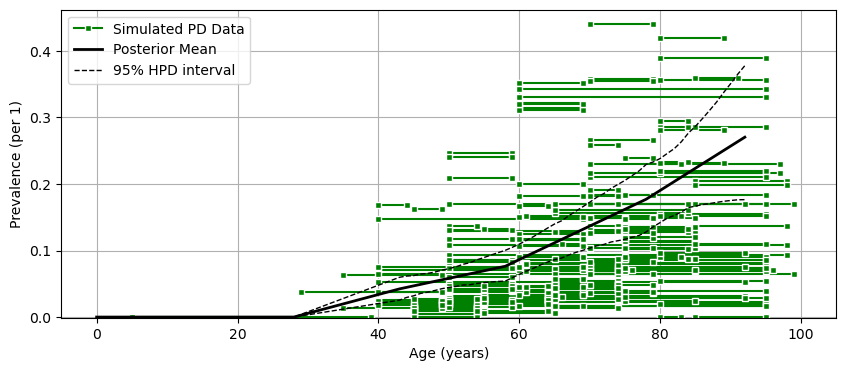

In [8]:
pipeline.visualize_pred(pred, pm_model.shared_data["data"])